<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Homework_1_Student_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip uninstall scipy -y

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1


In [ ]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 38.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score



## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!kaggle datasets download -d mojtabanafez/rayan-homework1

Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
 96% 63.0M/66.0M [00:00<00:00, 221MB/s]
100% 66.0M/66.0M [00:00<00:00, 215MB/s]


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

### 1

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2

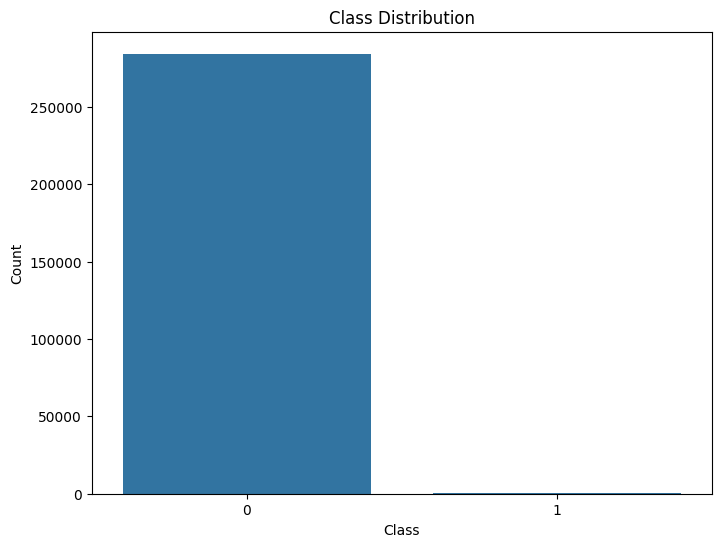

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculate percentage of each class
class_counts = df['Class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100
print('Class Distribution:')
print(class_percentages)

Class Distribution:
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


### 3

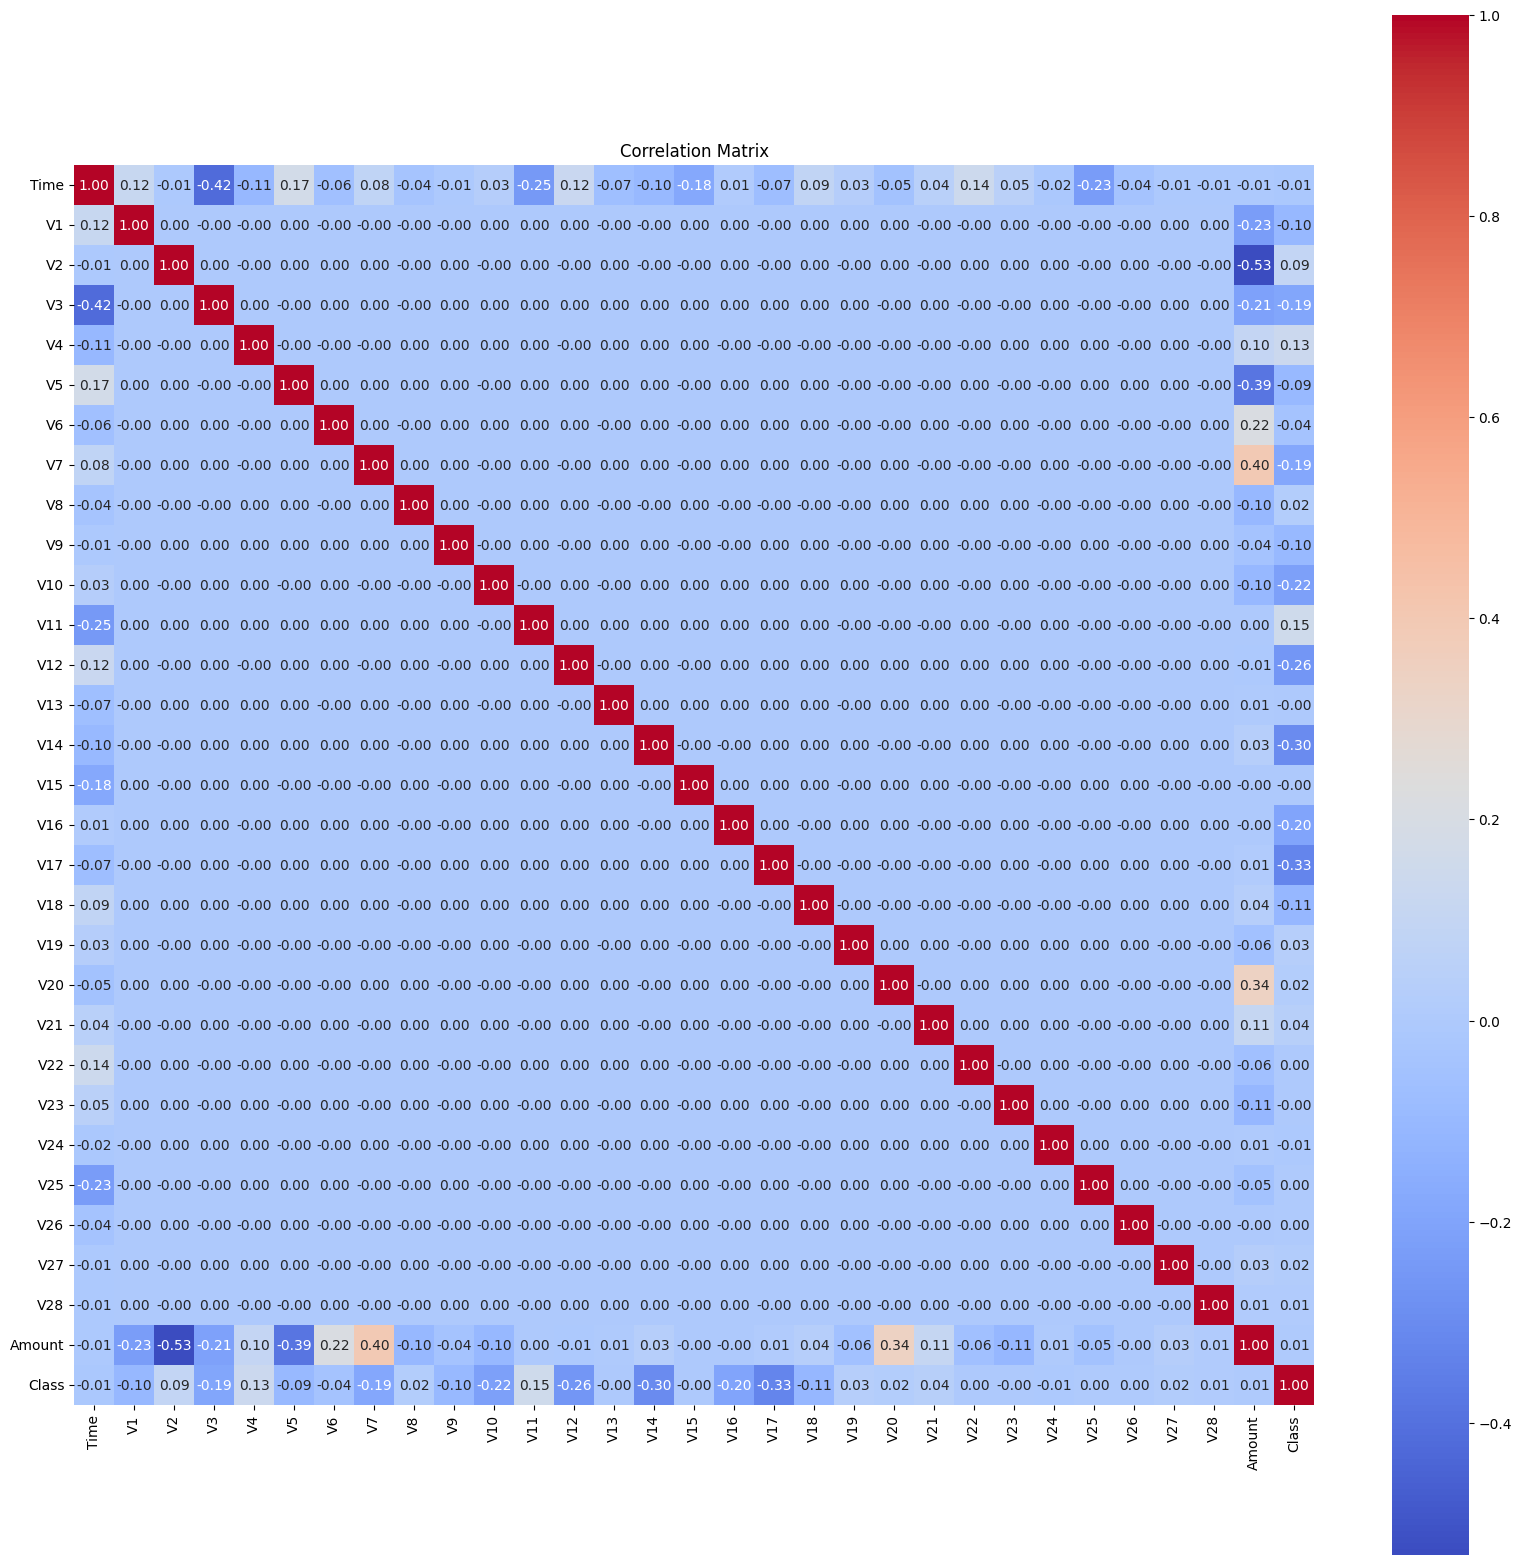

In [ ]:
# Check correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### 4

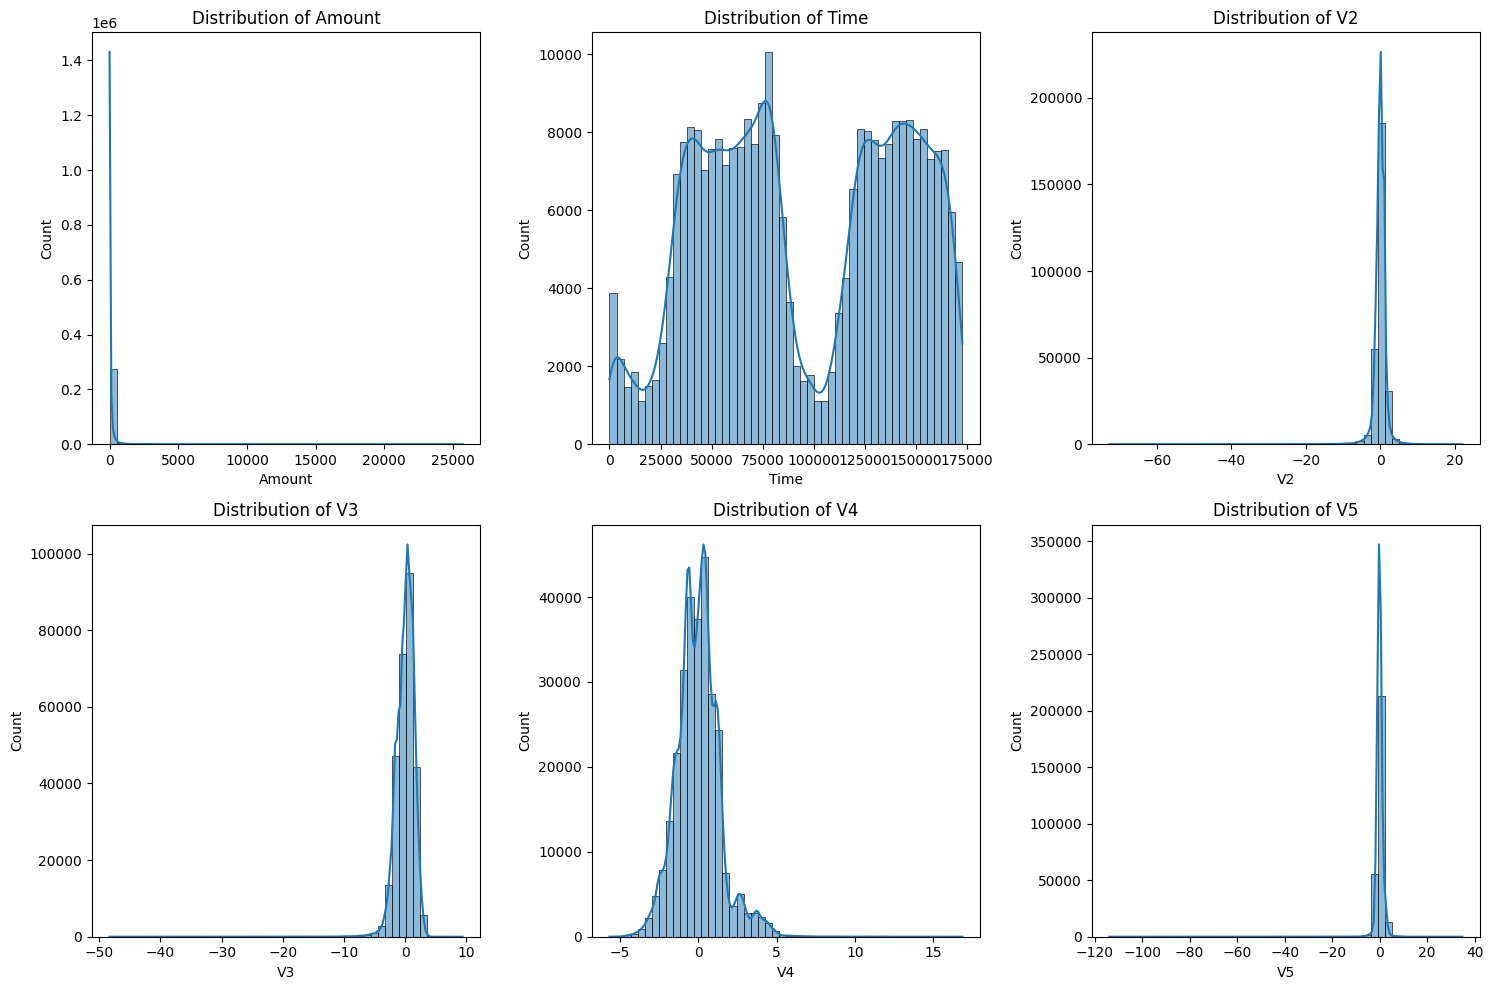

In [ ]:
# Plot the distribution of some selected features
selected_features = ['Amount', 'Time','V2','V3', 'V4', 'V5']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


1. **Distribution of Amount**: This histogram shows the frequency of different transaction amounts. The x-axis represents the transaction amounts, while the y-axis indicates the count of occurrences for each amount. The distribution may reveal whether most transactions are small, large, or if there are outliers.

2. **Distribution of Time**: This histogram illustrates the frequency of transactions over time. The x-axis represents time (possibly in seconds or another unit), and the y-axis shows how many transactions occurred at each time point. Peaks in this distribution could indicate busy periods.

3. **Distribution of V2**: This histogram represents the distribution of the variable V2. The x-axis shows the values of V2, and the y-axis indicates the count of occurrences. The shape of this distribution can provide insights into the characteristics of this variable.

4. **Distribution of V3**: Similar to V2, this histogram shows the distribution of the variable V3. The analysis would focus on the spread and central tendency of the values.

5. **Distribution of V4**: This histogram depicts the distribution of V4. Observing the shape can help identify patterns, such as skewness or the presence of multiple modes.

6. **Distribution of V5**: Finally, this histogram shows the distribution of V5. Like the others, it helps in understanding the frequency of different values.

> General Observations:
- **Skewness**: If any of the distributions are skewed (asymmetrical), it may indicate that the data has outliers or is not normally distributed.
- **Peaks**: Multiple peaks in a histogram can suggest that the data may come from different groups or categories.
- **Range**: The range of values in each histogram can indicate the variability of the data.



### 5

#### Outlier Detection

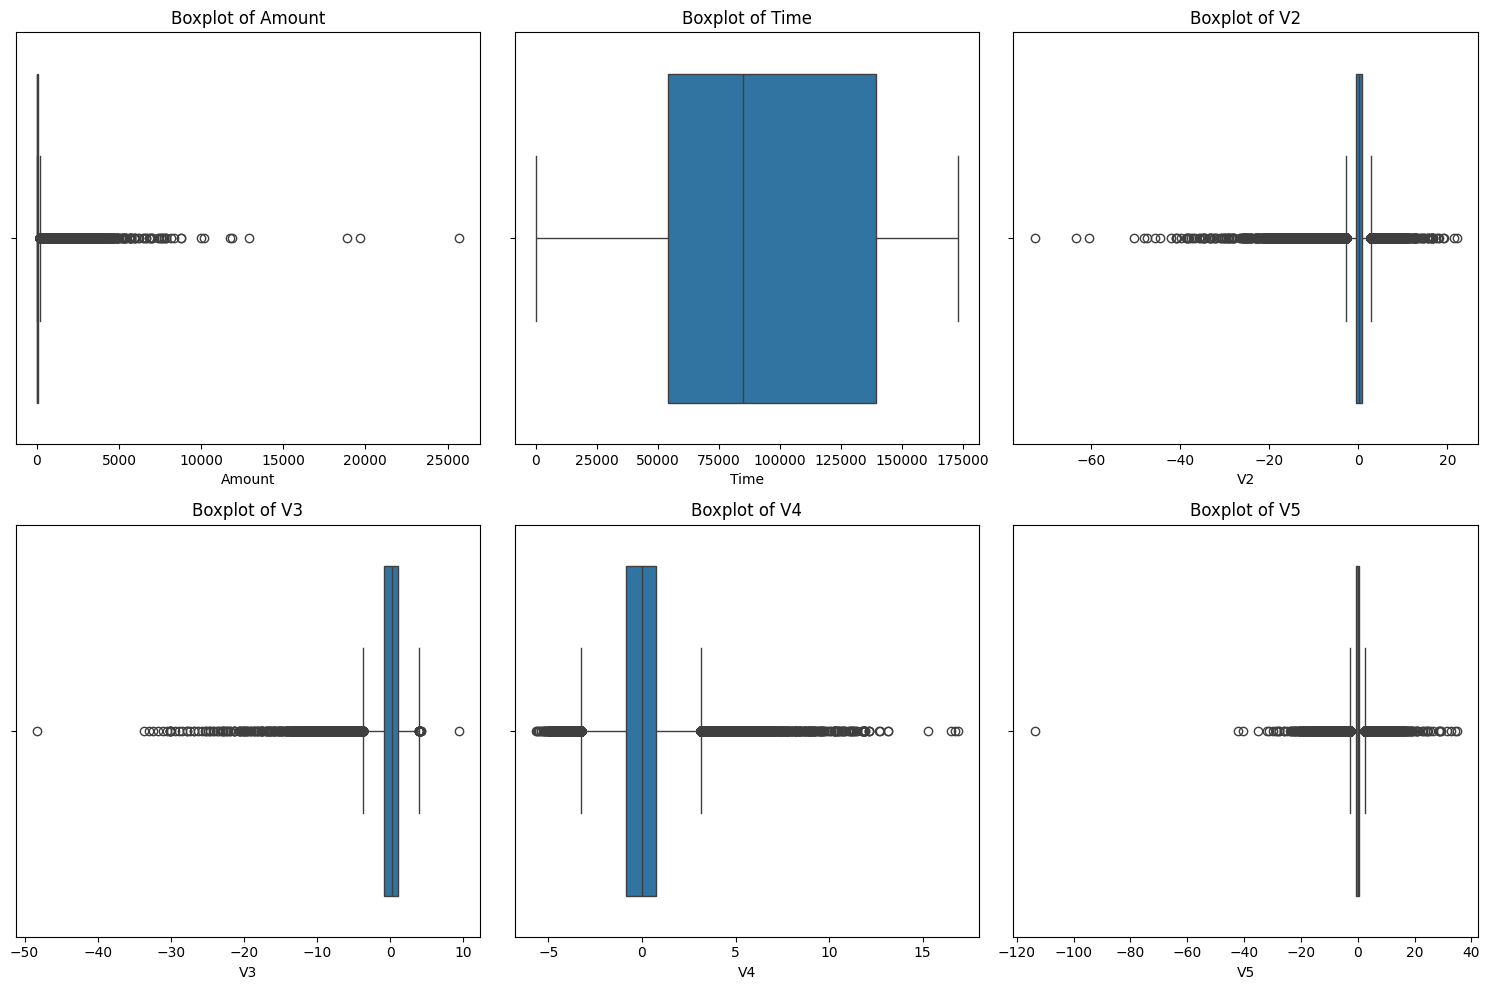

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#### Feature Engineering

In [ ]:
# Feature engineering: Create new features based on existing ones
df['Amount_log'] = np.log1p(df['Amount'])
df['Time_hours'] = df['Time'] / 3600

# Check the new features
df[['Amount', 'Amount_log', 'Time', 'Time_hours']].head()

,Amount,Amount_log,Time,Time_hours
0,149.62,5.014760,0.0,0.000000
1,2.69,1.305626,0.0,0.000000
2,378.66,5.939276,1.0,0.000278
3,123.50,4.824306,1.0,0.000278
4,69.99,4.262539,2.0,0.000556


#### Insightful Plots

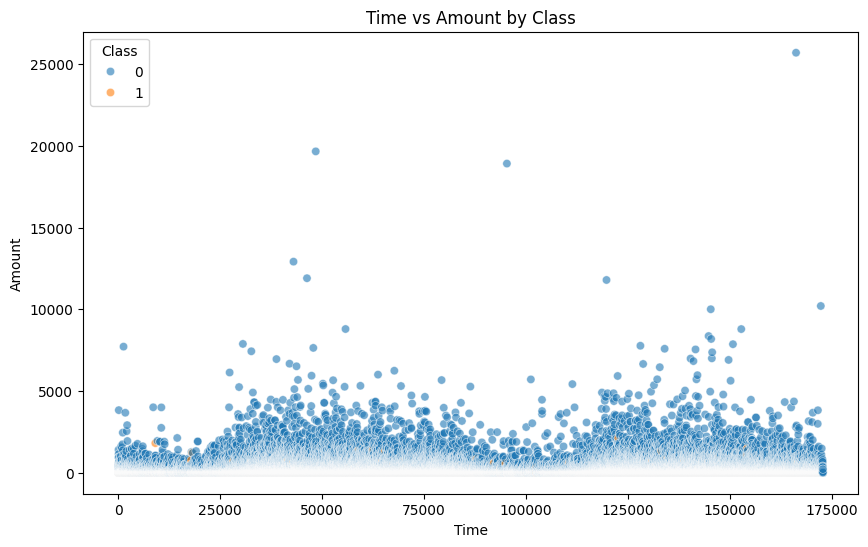

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Time vs Amount by Class')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

#### Data Visualization (After Dimension Reduction)

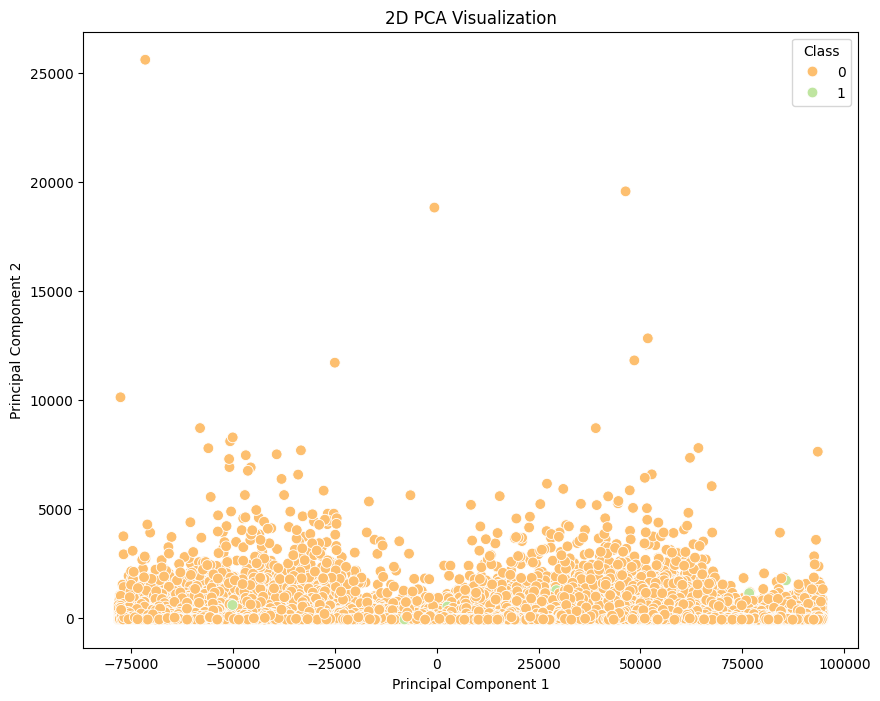

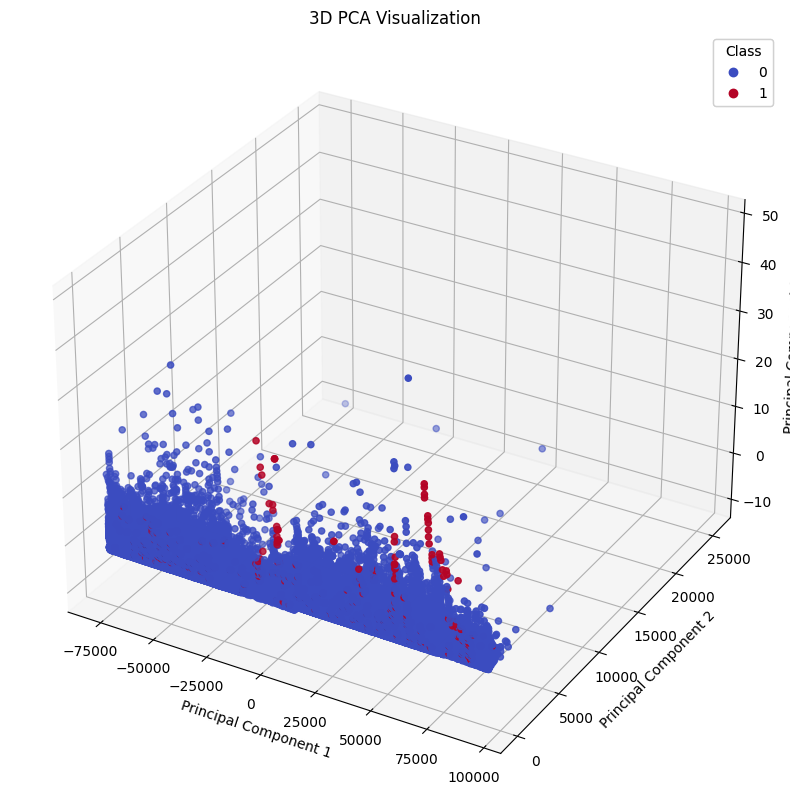

In [ ]:
# Apply PCA to reduce dimensions to 2D for visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train)

# Create a DataFrame for easier plotting
df_pca_2d = pd.DataFrame(X_train_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Class'] = y_train.values

# Plotting the 2D PCA-reduced data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca_2d, palette='Spectral', s=60)
plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply PCA to reduce dimensions to 3D for visualization
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)

# Create a DataFrame for easier plotting
df_pca_3d = pd.DataFrame(X_train_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Class'] = y_train.values

# Plotting the 3D PCA-reduced data
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], c=df_pca_3d['Class'], cmap='coolwarm')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Class")
ax.add_artist(legend1)

plt.show()

#### Pairplot

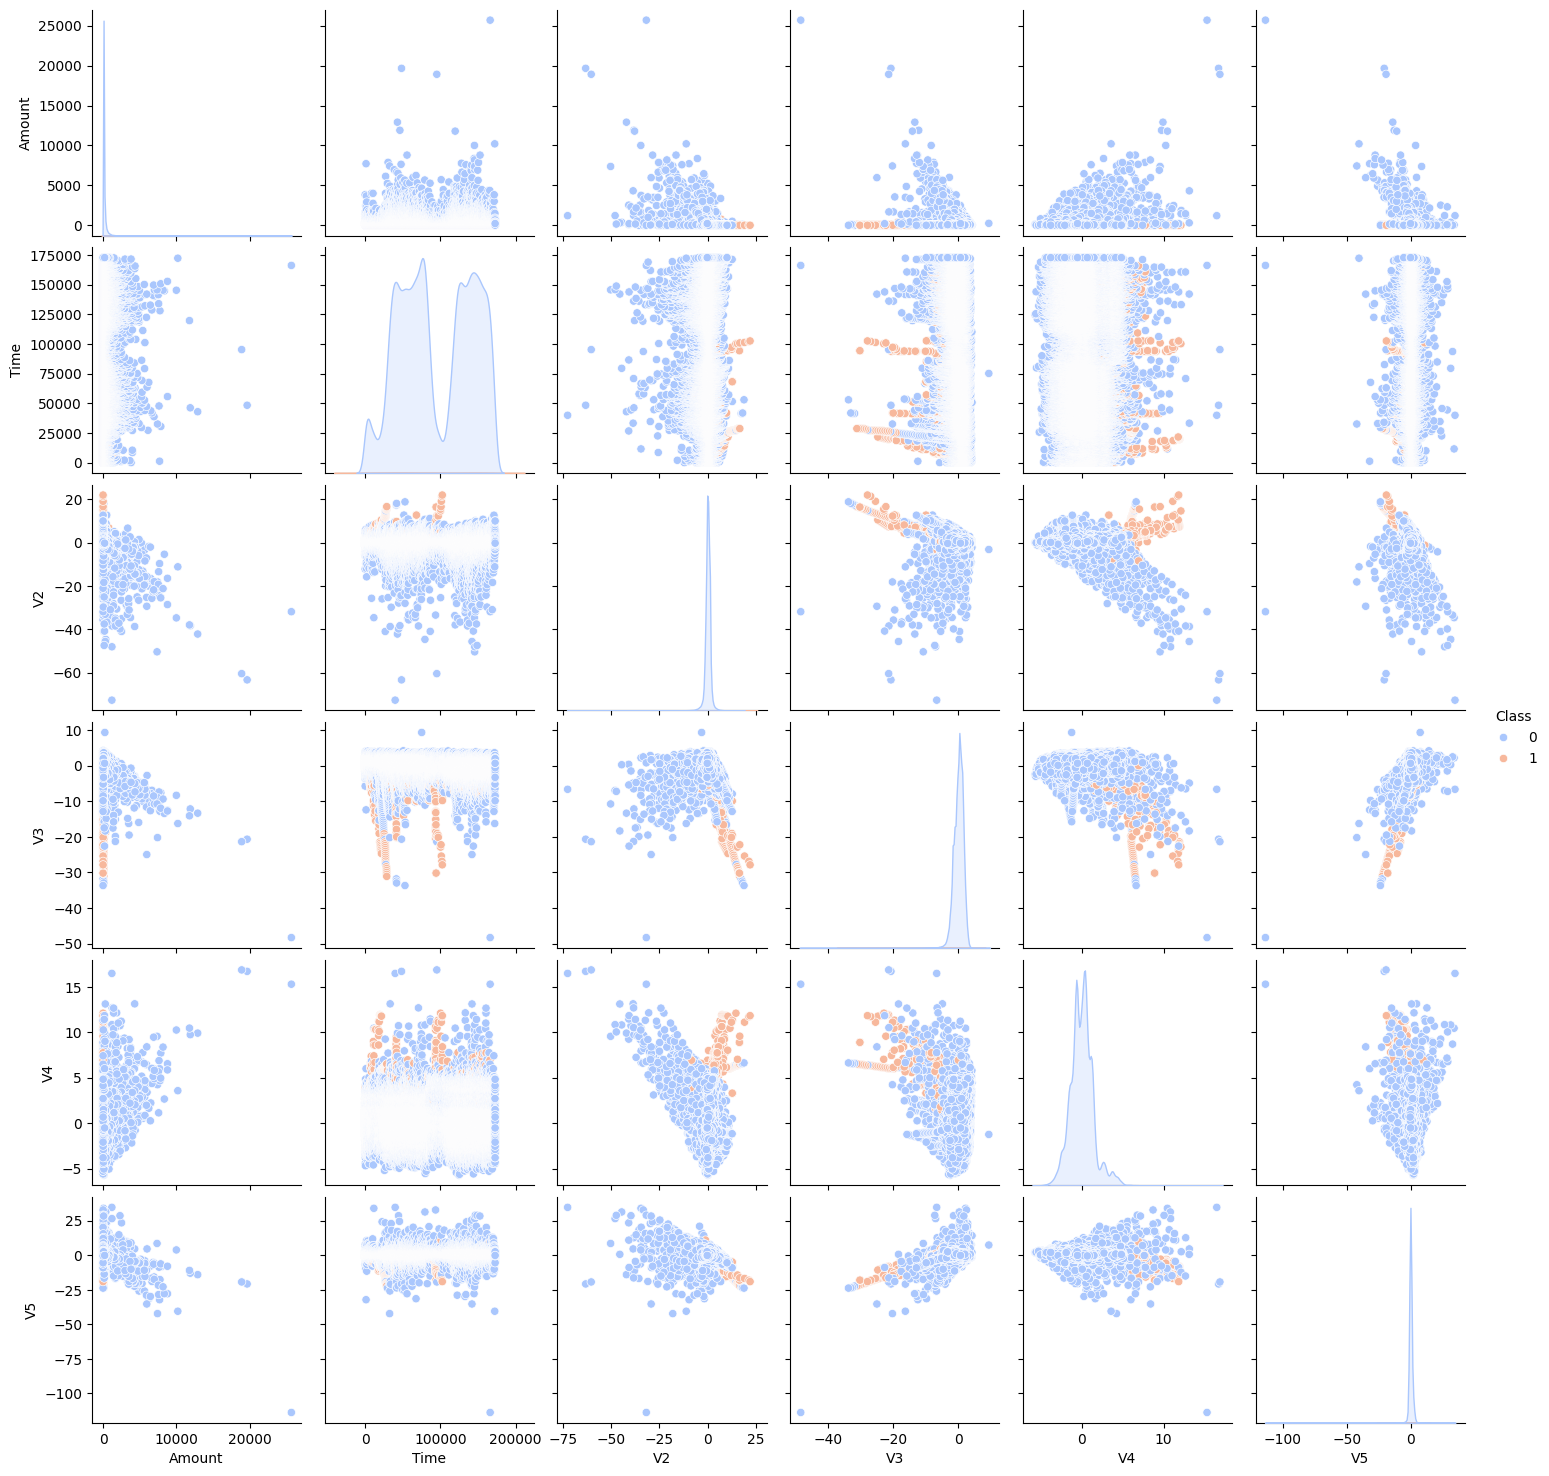

In [ ]:
# Pairplot of selected features
sns.pairplot(df[selected_features + ['Class']], hue='Class', palette='coolwarm')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.

- Class Imbalance:





The distribution of the 'Class' feature reveals a significant class imbalance. Specifically, fraudulent transactions (Class 1) are considerably less frequent than non-fraudulent ones (Class 0). This discrepancy can lead to biased models that excel at predicting the majority class but struggle with the minority class.

This issue is further illustrated by the count plot of the class distribution, which clearly shows that the number of fraudulent transactions is dramatically lower than that of non-fraudulent transactions. Addressing this imbalance is crucial for developing a model that accurately detects fraud while minimizing false negatives.





- Outliers:

The boxplots of various features indicate the presence of outliers. These outliers can affect the performance of many machine learning models, particularly those sensitive to the range of the data, such as linear regression and k-nearest neighbors.
Outliers were visible in features such as 'V1', 'V2', and 'V3', where certain values were significantly distant from the rest of the data points.

---
<br>

2. Analyze the correlation matrix of the features.<br>

A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the matrix shows the correlation between two variables, ranging from -1 to 1:

- **1** indicates a perfect positive correlation (as one variable increases, the other also increases).
- **-1** indicates a perfect negative correlation (as one variable increases, the other decreases).
- **0** indicates no correlation (the variables do not affect each other).

### Key Features of the Matrix:

1. **Diagonal Values**: The diagonal values (from the top left to the bottom right) are all 1, as each variable is perfectly correlated with itself.

2. **Symmetry**: The matrix is symmetric; the correlation between variable A and variable B is the same as that between variable B and variable A.

3. **Color Coding**: The color gradient (from blue to red) visually represents the strength of the correlations:
   - Darker shades of red indicate strong positive correlations.
   - Darker shades of blue indicate strong negative correlations.
   - Lighter colors indicate weaker correlations.

4. **Variable Relationships**: By examining the values, you can identify which variables are strongly correlated and which are not. For example, if two variables have a correlation of 0.8, they have a strong positive relationship.

### Interpretation:

- **High Positive Correlation**: Variables with values close to 1 (e.g., 0.8 or higher) are likely to move together.
- **High Negative Correlation**: Variables with values close to -1 indicate that as one variable increases, the other tends to decrease.
- **Low Correlation**: Values close to 0 suggest that the variables do not have a linear relationship.



> The image you provided is a correlation matrix, which visually represents the relationships between multiple variables in a dataset. Here’s a breakdown of its components:

### Structure of the Matrix:

1. **Variables**: The rows and columns represent different variables (e.g., `Time`, `V1`, `V2`, ..., `V25`, `Class`, `Amount`). Each variable is compared against every other variable.

2. **Diagonal Values**: The diagonal (from the top left to the bottom right) contains values of 1.0, indicating that each variable is perfectly correlated with itself.

3. **Correlation Coefficients**: The values in the cells indicate the strength and direction of the correlation between pairs of variables:
   - **Positive Correlation**: Values close to 1 (e.g., `0.12`, `0.13`) indicate a positive relationship.
   - **Negative Correlation**: Values close to -1 indicate a negative relationship, though in this matrix, there are no strong negative correlations.
   - **Weak Correlation**: Values close to 0 (e.g., `0.00`, `0.01`) suggest little to no linear relationship.

### Color Coding:

- **Color Gradient**: The matrix uses a color gradient to represent the strength of correlations:
  - **Red Shades**: Indicate positive correlations (darker red for stronger correlations).
  - **Blue Shades**: Indicate negative correlations (though there are few in this matrix).
  - **Light Colors**: Suggest weak correlations.

### Key Observations:

- **Strong Correlations**: Look for darker red cells to identify strong positive correlations. For example, if `V1` and `V2` have a correlation of `0.85`, they are strongly positively correlated.
  
- **Weak or No Correlation**: Many variables show values close to 0, indicating weak or no correlation.

- **Class and Amount**: The correlation of `Class` and `Amount` with other variables can provide insights into how these features relate to the target variable.

## Conclusion:

The correlation matrix shows that many of the features have low to no correlation with each other. This is expected in datasets where features have been transformed using techniques such as PCA.
Some features have a slight positive or negative correlation, but none of the features are highly correlated (i.e., close to 1 or -1).
The low correlation between features suggests that multicollinearity might not be a significant issue in this dataset.
<br>

---

3. Is your data linearly separable? Please provide a rationale.







Based on the PCA visualization and the correlation matrix, it appears that the data is not linearly separable.
The PCA scatter plot does not show distinct clusters for the two classes; instead, the points are intermingled, indicating that simple linear boundaries would not suffice to separate the classes effectively.
The rationale for this conclusion is that if the data were linearly separable, we would expect to see clear clusters or separations in the PCA plot. Instead, we see an overlap, suggesting the need for more complex, non-linear decision boundaries.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


### Data Cleaning

In [ ]:
# Outlier Detection and Treatment using Z-score
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df.drop('Class', axis=1)))

# Define a threshold
threshold = 3

# Get indices of outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
df_clean = df[(z_scores < threshold).all(axis=1)]

# Check for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
Time_hours    0
dtype: int64


###  Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_clean.drop('Class', axis=1))

# Standardization
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_clean.drop('Class', axis=1))

###  Feature Engineering

In [ ]:
# Feature creation: Example of creating new features has already been shown
df_clean['Amount_log'] = np.log1p(df_clean['Amount'])
df_clean['Time_hours'] = df_clean['Time'] / 3600

# Feature selection: Using correlation matrix to drop features with low correlation to the target
correlation_matrix = df_clean.corr()
target_corr = correlation_matrix['Class'].abs()
relevant_features = target_corr[target_corr > 0.1].index.tolist()
df_selected = df_clean[relevant_features]

### Data Reduction

In [ ]:
# Ensure that df_selected includes the necessary features
df_selected = df.dropna()  # Example of dropping missing values if applicable

# Check and drop 'Class' only before PCA
if 'Class' in df.columns:
    df_selected = df.drop('Class', axis=1)
else:
    df_selected = df.copy()

# Ensure the selected DataFrame has the necessary features
print("Columns in df_selected after re-selection:", df_selected.columns)

# If `df_selected` now has sufficient features, you can perform PCA again
if len(df_selected.columns) > 1:
    X = df_selected
    pca = PCA(n_components=10)
    X_reduced = pca.fit_transform(X)

    # Combine with the original 'Class' column
    df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
    df_reduced['Class'] = df['Class'].values

    print("PCA completed successfully and the dataset has been reduced.")
else:
    print("df_selected still does not have enough features to perform PCA.")


Columns in df_selected after re-selection: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Amount_log', 'Time_hours'],
      dtype='object')
PCA completed successfully and the dataset has been reduced.


### Resampling Techniques

In [ ]:
# Oversampling using SMOTE
smote = SMOTE(random_state=42)
# df_selected no longer has 'Class' column, use df_reduced instead
X_smote, y_smote = smote.fit_resample(df_reduced.drop('Class', axis=1), df_reduced['Class'])

# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
# Use df_reduced for undersampling as well
X_under, y_under = under_sampler.fit_resample(df_reduced.drop('Class', axis=1), df_reduced['Class'])

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








### Logistic Regression

### 1&2

Unprocessed Data - Logistic Regression
Accuracy: 0.9990988144142879
Recall: 0.5514705882352942
Precision: 0.8241758241758241


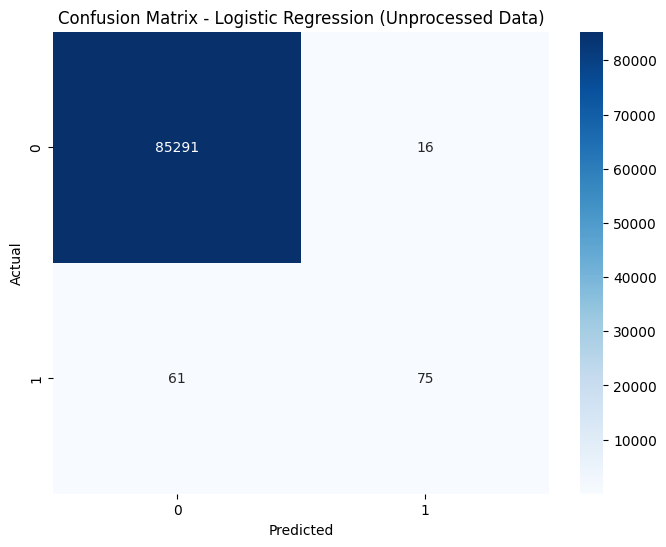

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.82      0.55      0.66       136

    accuracy                           1.00     85443
   macro avg       0.91      0.78      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Split the original (unpreprocessed) data
X_unprocessed = df.drop('Class', axis=1)
y_unprocessed = df['Class']
X_train_unprocessed, X_test_unprocessed, y_train_unprocessed, y_test_unprocessed = train_test_split(X_unprocessed, y_unprocessed, test_size=0.3, random_state=42)

# Train logistic regression model on unpreprocessed data
model_unprocessed = LogisticRegression(max_iter=1000)
model_unprocessed.fit(X_train_unprocessed, y_train_unprocessed)

# Predictions and evaluation on unpreprocessed data
y_pred_unprocessed = model_unprocessed.predict(X_test_unprocessed)
accuracy_unprocessed = accuracy_score(y_test_unprocessed, y_pred_unprocessed)
recall_unprocessed = recall_score(y_test_unprocessed, y_pred_unprocessed)
precision_unprocessed = precision_score(y_test_unprocessed, y_pred_unprocessed)

# Unprocessed Data Classification Report
classification_report_unprocessed = classification_report(y_test_unprocessed, y_pred_unprocessed)

print("Unprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_unprocessed}")
print(f"Recall: {recall_unprocessed}")
print(f"Precision: {precision_unprocessed}")
# Unprocessed Data Confusion Matrix
conf_matrix_unprocessed = confusion_matrix(y_test_unprocessed, y_pred_unprocessed)

# Plot confusion matrix for unprocessed data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_unprocessed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Unprocessed Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:")
print(classification_report_unprocessed)

In [ ]:
# Train logistic regression model on preprocessed data
model_preprocessed = LogisticRegression(max_iter=1000)
model_preprocessed.fit(X_train, y_train)

# Predictions and evaluation on preprocessed data
y_pred_preprocessed = model_preprocessed.predict(X_test)
accuracy_preprocessed = accuracy_score(y_test, y_pred_preprocessed)
recall_preprocessed = recall_score(y_test, y_pred_preprocessed)
precision_preprocessed = precision_score(y_test, y_pred_preprocessed)
conf_matrix_preprocessed = confusion_matrix(y_test, y_pred_preprocessed)
classification_report_preprocessed = classification_report(y_test, y_pred_preprocessed)

print("Preprocessed Data - Logistic Regression")
print(f"Accuracy: {accuracy_preprocessed}")
print(f"Recall: {recall_preprocessed}")
print(f"Precision: {precision_preprocessed}")
print("Confusion Matrix:")
print(conf_matrix_preprocessed)
print("Classification Report:")
print(classification_report_preprocessed)

Preprocessed Data - Logistic Regression
Accuracy: 0.999133925541004
Recall: 0.6323529411764706
Precision: 0.7818181818181819
Confusion Matrix:
[[85283    24]
 [   50    86]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.63      0.70       136

    accuracy                           1.00     85443
   macro avg       0.89      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### 3

In [ ]:
# K-Fold Cross Validation on preprocessed data
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_preprocessed, X_train, y_train, cv=kf, scoring='accuracy')

print(f"K-Fold Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

K-Fold Cross Validation Scores: [0.99919745 0.99924761 0.99902189 0.99902189 0.99912219]
Mean CV Accuracy: 0.9991222086233342


### 4

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate best model on test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

print("Best Model - Logistic Regression with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best}")
print(f"Recall: {recall_best}")
print(f"Precision: {precision_best}")
print("Confusion Matrix:")
print(conf_matrix_best)
print("Classification Report:")
print(classification_report_best)


Best Model - Logistic Regression with Hyperparameter Tuning
Accuracy: 0.9991924440855307
Recall: 0.6102941176470589
Precision: 0.8383838383838383
Confusion Matrix:
[[85291    16]
 [   53    83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.84      0.61      0.71       136

    accuracy                           1.00     85443
   macro avg       0.92      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
######################################################
###################### TO DO #########################
######################################################
pass
######################################################
######################################################
######################################################

In [ ]:
##################################### TO DO #######################################
## Feel free to add more cells and employ creative ideas to enhance performance. ##
###################################################################################
pass
###################################################################################
###################################################################################
###################################################################################


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

  **Student Answer:**  .......

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

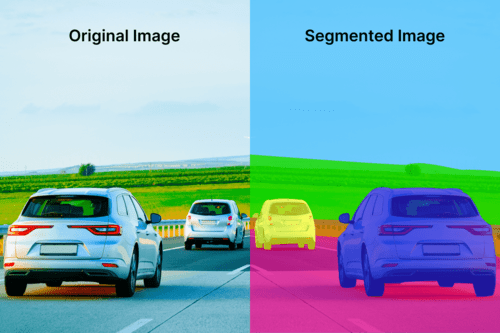

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








In [ ]:
# Elbow Method or # Silhouette Score
######################################################
###################### TO DO #########################
######################################################
pass # The optimal number of clusters when clustering all pixels represents the predominant colors in an image.
######################################################
######################################################
######################################################


## Visualize Dominant Color

In [ ]:
# Now that you have the number of dominant colors (clusters),
# use clustering to determine the cluster of each pixel.
######################################################
###################### TO DO #########################
######################################################
dominant_colors = None
kmeans = None
pass
######################################################
######################################################
######################################################
kmeans.fit(all_pixels)

In [ ]:
#######Plot the each of dominant color as image#######
####### Dominant colors are center of cluster ########
###################### TO DO #########################
pass
######################################################
######################################################
######################################################

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()